In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
path='../input/spaceship-titanic'

In [3]:
train_df=pd.read_csv(path+'/train.csv')
test_df=pd.read_csv(path+'/test.csv')
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


imported null_func utility script i made [here](https://www.kaggle.com/ahmadhumayun/null-func) for cleaning null values and notebook from which i made the utility script is [here](https://www.kaggle.com/ahmadhumayun/spaceship-titanic-null-values)
and imported eda_func utility script i made [here](https://www.kaggle.com/ahmadhumayun/eda-func) for EDA and notebook from which i made the utility script is [here](https://www.kaggle.com/ahmadhumayun/space-titanic-eda)



In [4]:
import null_func,eda_func

In [5]:
train_drop_nan,train_df=null_func.null_converter(train_df)

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
Total NUll Values: 2324
null values w.r.t option 1 0
Total NUll Values w.r.t option 2: 0


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data=train_drop_nan

Transported  False  True   All
HomePlanet                    
Earth         2478  1829  4307
Europa         676  1311  1987
Mars           787   856  1643
All           3941  3996  7937


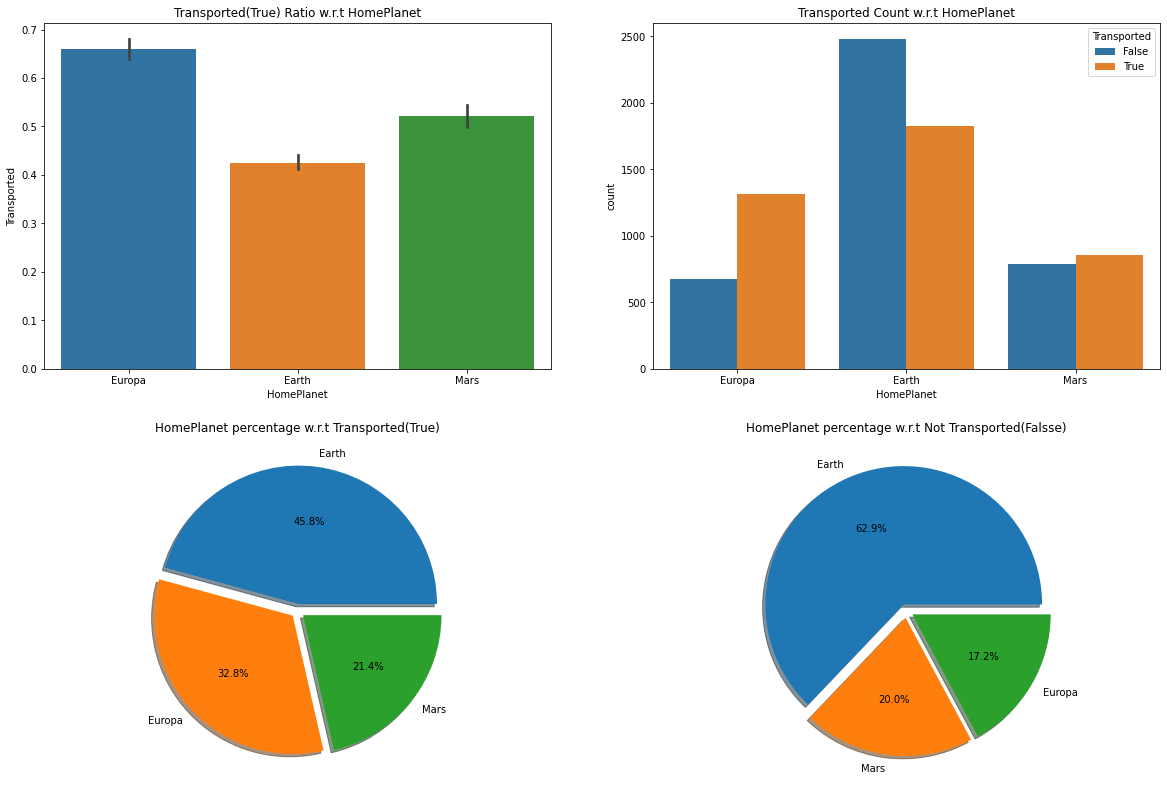

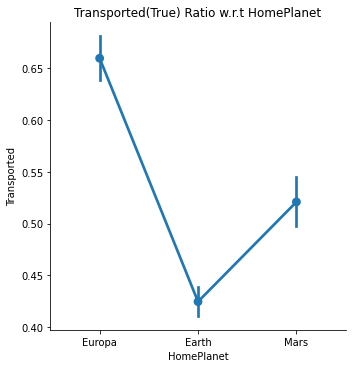

Transported           False  True   All
HomePlanet CryoSleep                   
Earth      False       2008   951  2959
           True         470   878  1348
Europa     False        666   442  1108
           True          10   869   879
Mars       False        728   277  1005
           True          59   579   638
All                    3941  3996  7937


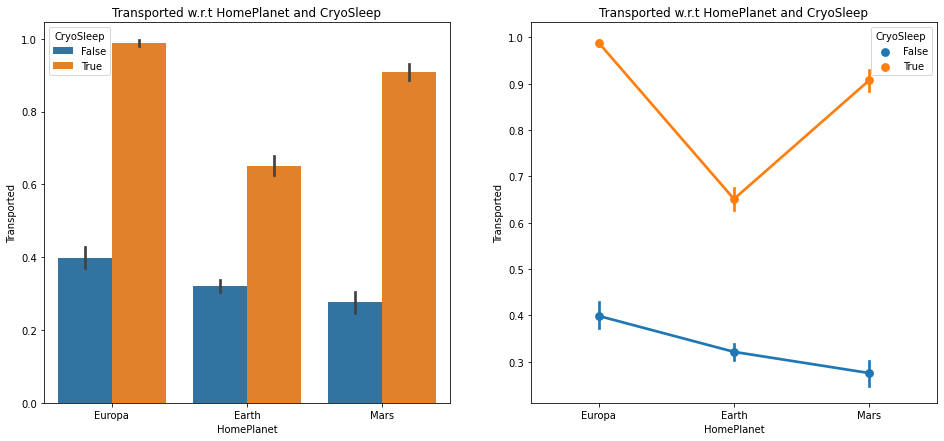

Transported               False  True   All
HomePlanet Destination                     
Earth      55 Cancri e      324   334   658
           PSO J318.5-22    337   342   679
           TRAPPIST-1e     1817  1153  2970
Europa     55 Cancri e      259   578   837
           PSO J318.5-22      4    14    18
           TRAPPIST-1e      413   719  1132
Mars       55 Cancri e       72   112   184
           PSO J318.5-22     26    22    48
           TRAPPIST-1e      689   722  1411
All                        3941  3996  7937


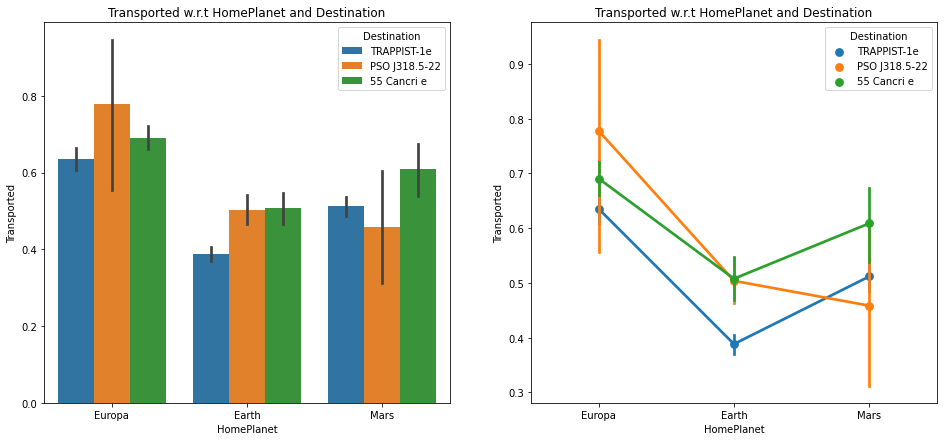

Transported       False  True   All
HomePlanet VIP                     
Earth      False   2478  1829  4307
Europa     False    601  1222  1823
           True      75    89   164
Mars       False    723   843  1566
           True      64    13    77
All                3941  3996  7937


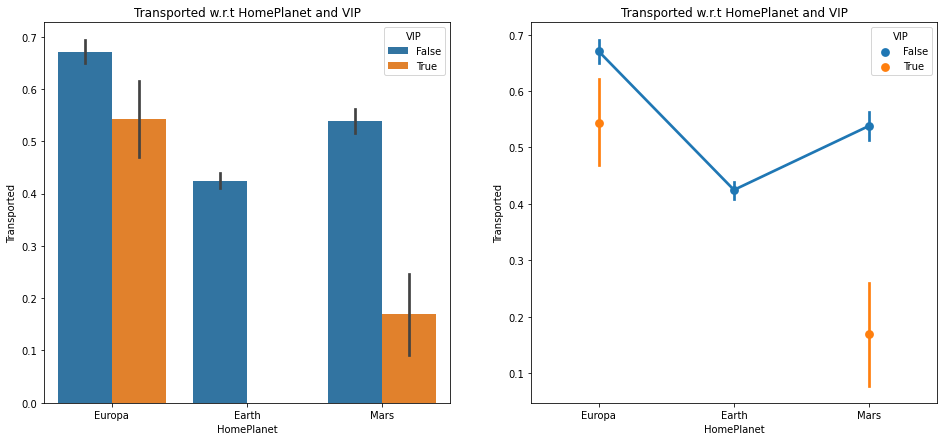

Transported  False  True   All
CryoSleep                     
False         3402  1670  5072
True           539  2326  2865
All           3941  3996  7937


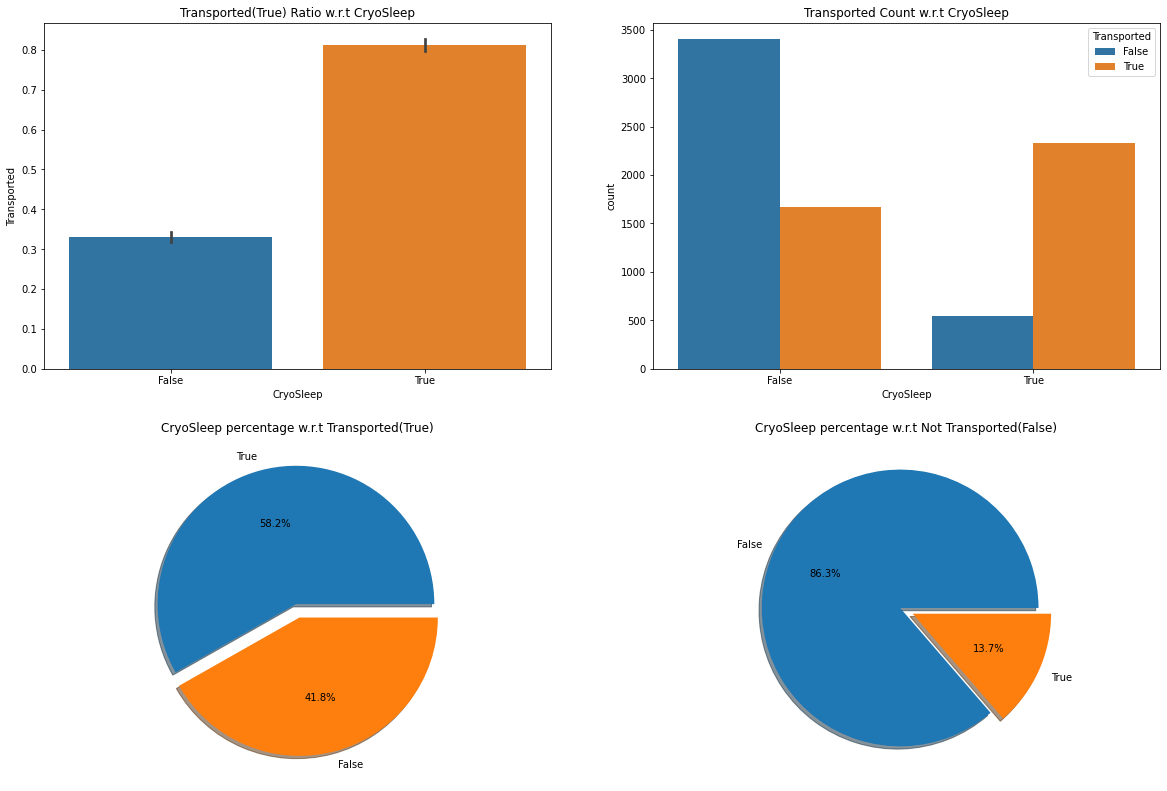

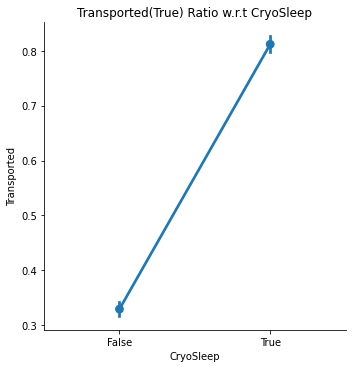

Transported           False  True   All
CryoSleep HomePlanet                   
False     Earth        2008   951  2959
          Europa        666   442  1108
          Mars          728   277  1005
True      Earth         470   878  1348
          Europa         10   869   879
          Mars           59   579   638
All                    3941  3996  7937


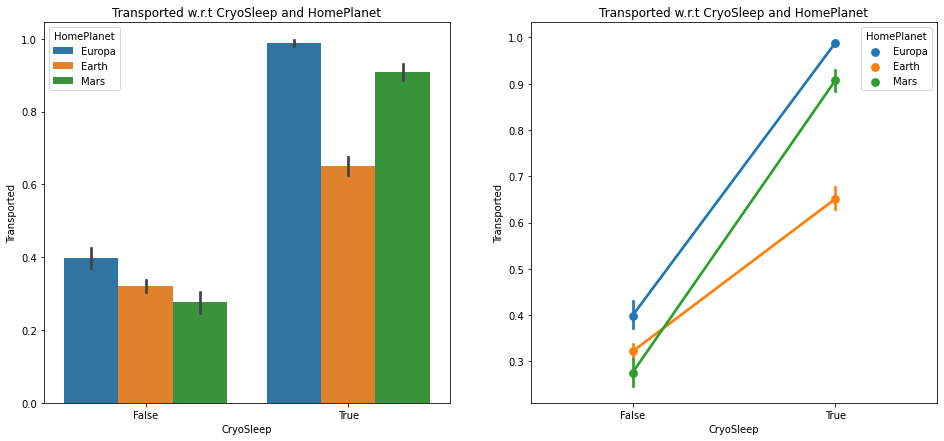

Transported              False  True   All
CryoSleep Destination                     
False     55 Cancri e      603   376   979
          PSO J318.5-22    252   126   378
          TRAPPIST-1e     2547  1168  3715
True      55 Cancri e       52   648   700
          PSO J318.5-22    115   252   367
          TRAPPIST-1e      372  1426  1798
All                       3941  3996  7937


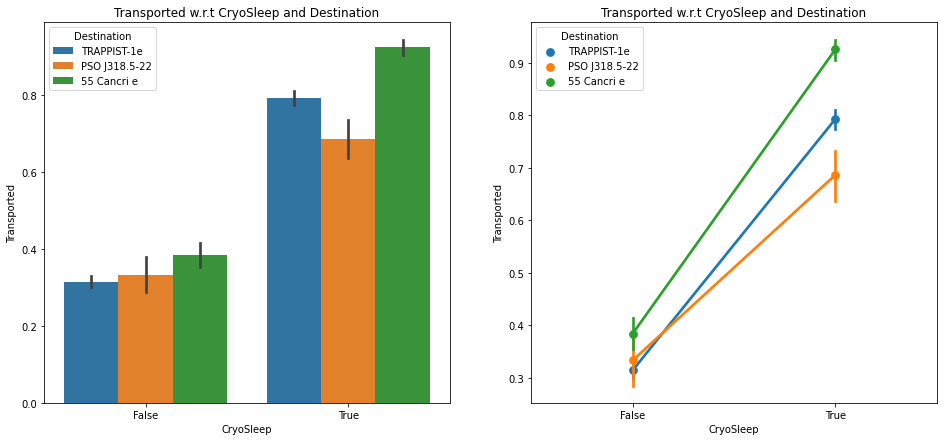

Transported      False  True   All
CryoSleep VIP                     
False     False   3263  1607  4870
          True     139    63   202
True      False    539  2287  2826
          True       0    39    39
All               3941  3996  7937


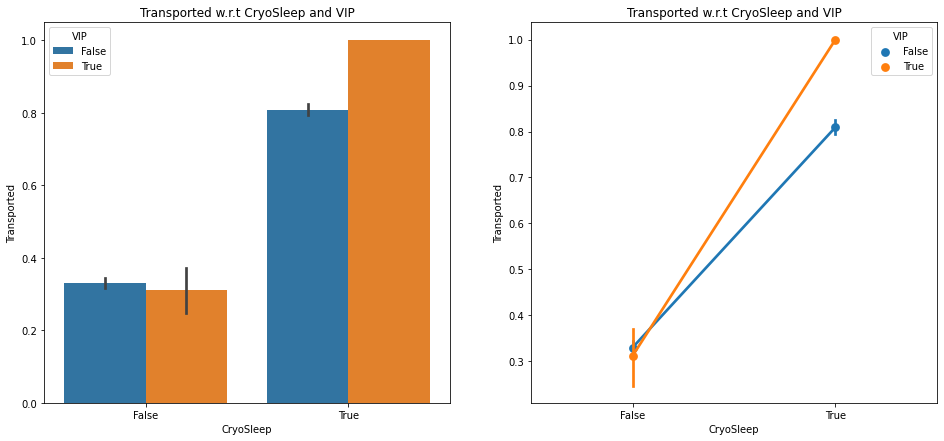

Transported    False  True   All
Destination                     
55 Cancri e      655  1024  1679
PSO J318.5-22    367   378   745
TRAPPIST-1e     2919  2594  5513
All             3941  3996  7937


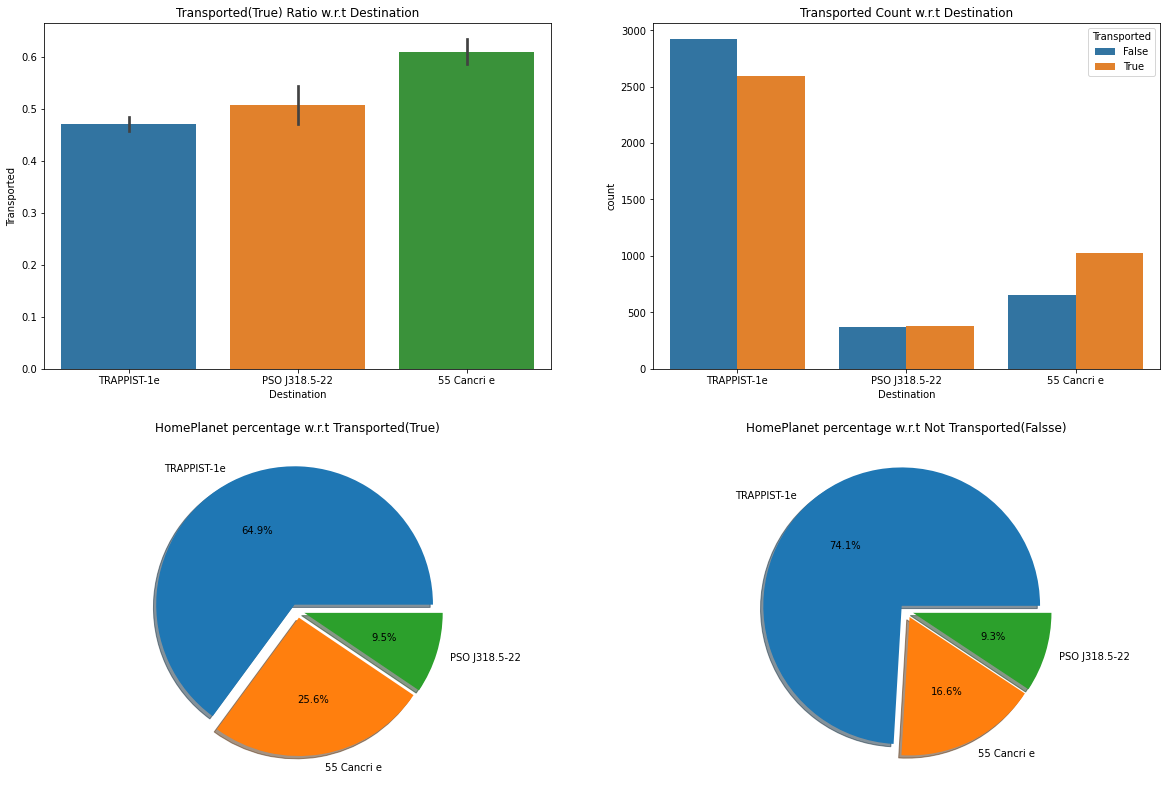

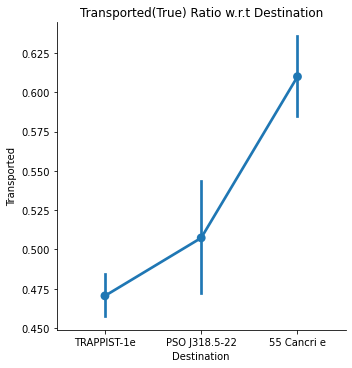

Transported               False  True   All
Destination   HomePlanet                   
55 Cancri e   Earth         324   334   658
              Europa        259   578   837
              Mars           72   112   184
PSO J318.5-22 Earth         337   342   679
              Europa          4    14    18
              Mars           26    22    48
TRAPPIST-1e   Earth        1817  1153  2970
              Europa        413   719  1132
              Mars          689   722  1411
All                        3941  3996  7937


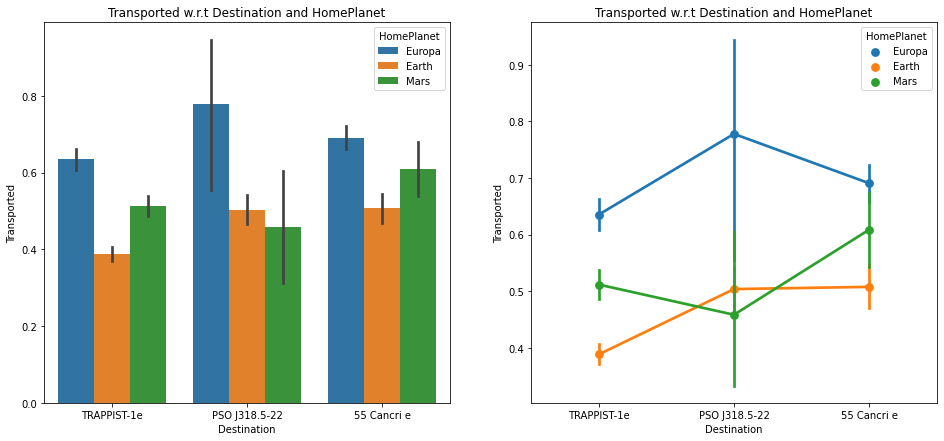

Transported              False  True   All
Destination   CryoSleep                   
55 Cancri e   False        603   376   979
              True          52   648   700
PSO J318.5-22 False        252   126   378
              True         115   252   367
TRAPPIST-1e   False       2547  1168  3715
              True         372  1426  1798
All                       3941  3996  7937


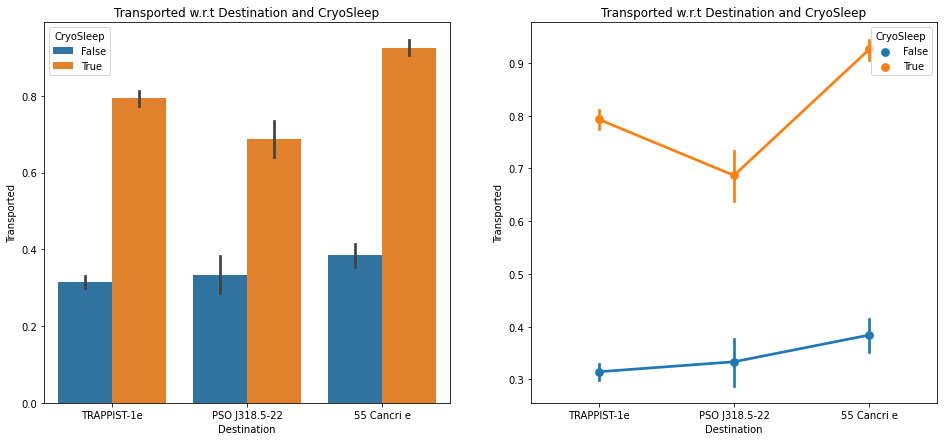

Transported          False  True   All
Destination   VIP                     
55 Cancri e   False    615   987  1602
              True      40    37    77
PSO J318.5-22 False    357   370   727
              True      10     8    18
TRAPPIST-1e   False   2830  2537  5367
              True      89    57   146
All                   3941  3996  7937


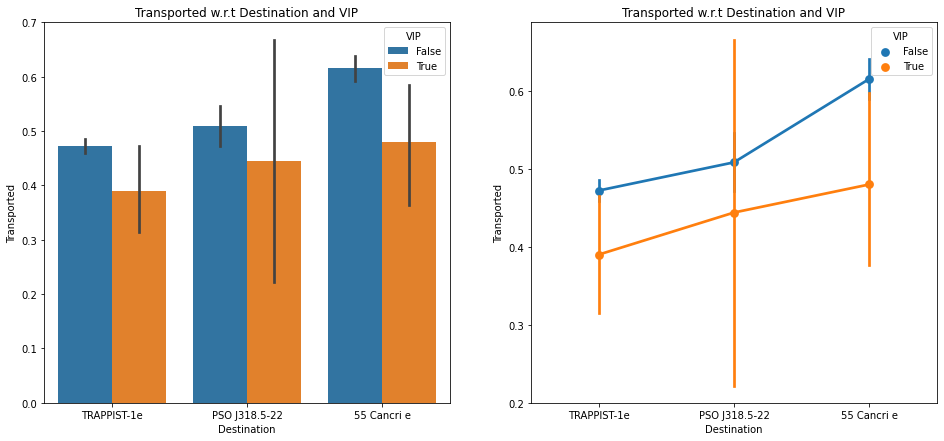

Transported  False  True   All
VIP                           
False         3802  3894  7696
True           139   102   241
All           3941  3996  7937


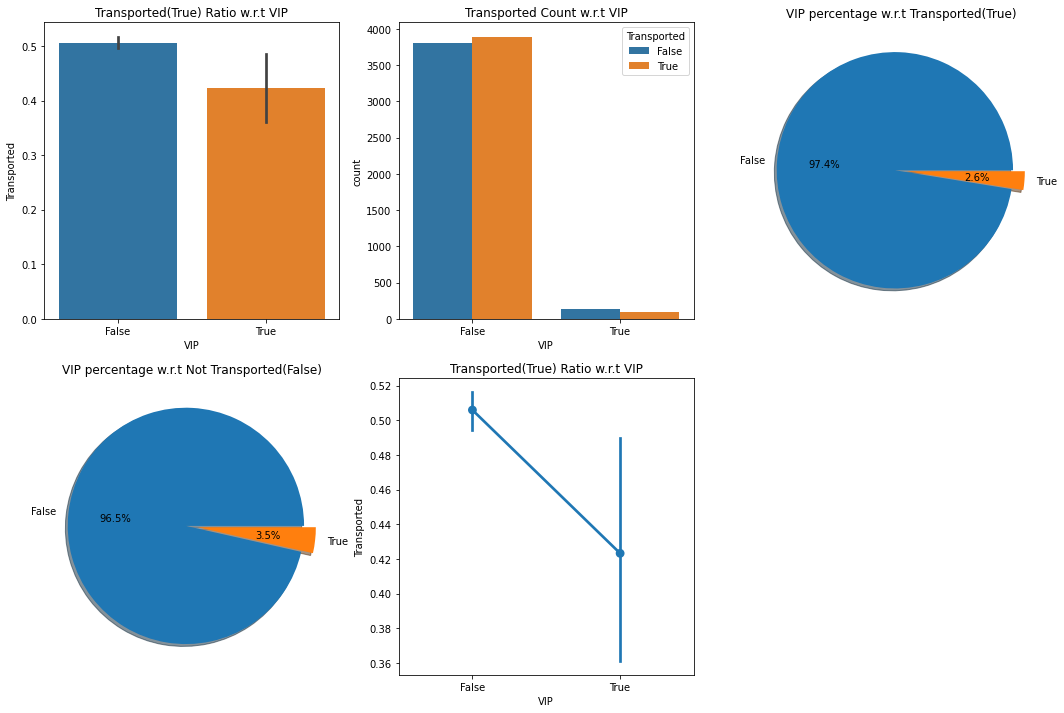

Transported       False  True   All
VIP   HomePlanet                   
False Earth        2478  1829  4307
      Europa        601  1222  1823
      Mars          723   843  1566
True  Europa         75    89   164
      Mars           64    13    77
All                3941  3996  7937


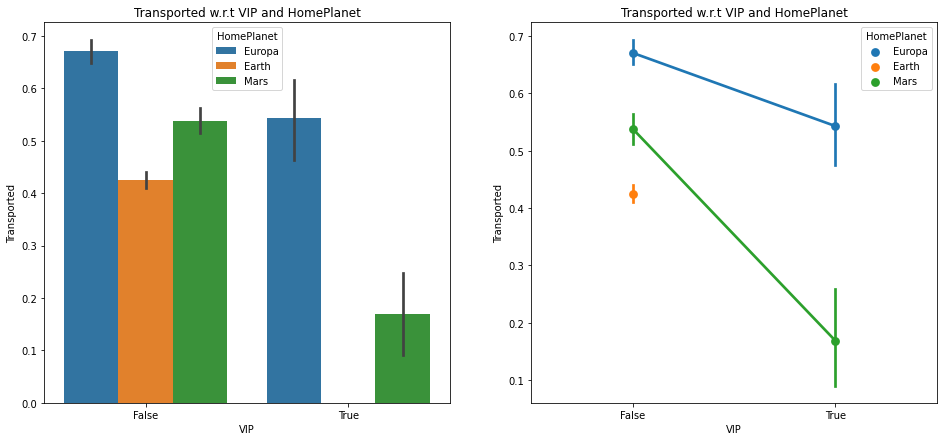

Transported      False  True   All
VIP   CryoSleep                   
False False       3263  1607  4870
      True         539  2287  2826
True  False        139    63   202
      True           0    39    39
All               3941  3996  7937


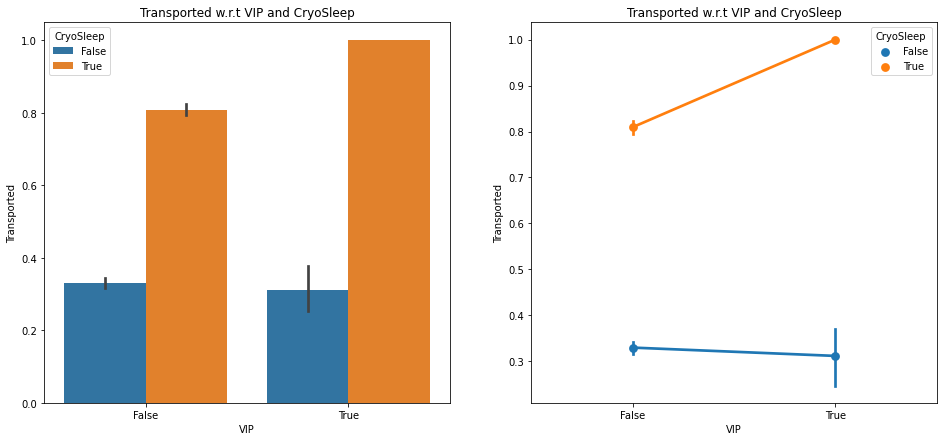

Transported          False  True   All
VIP   Destination                     
False 55 Cancri e      615   987  1602
      PSO J318.5-22    357   370   727
      TRAPPIST-1e     2830  2537  5367
True  55 Cancri e       40    37    77
      PSO J318.5-22     10     8    18
      TRAPPIST-1e       89    57   146
All                   3941  3996  7937


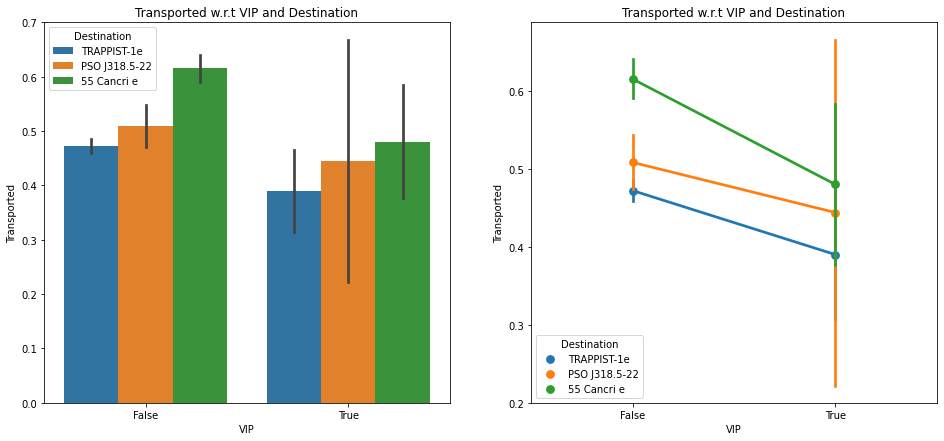

Min age  0.0
Mean age  28.772710091974297
Max age  79.0


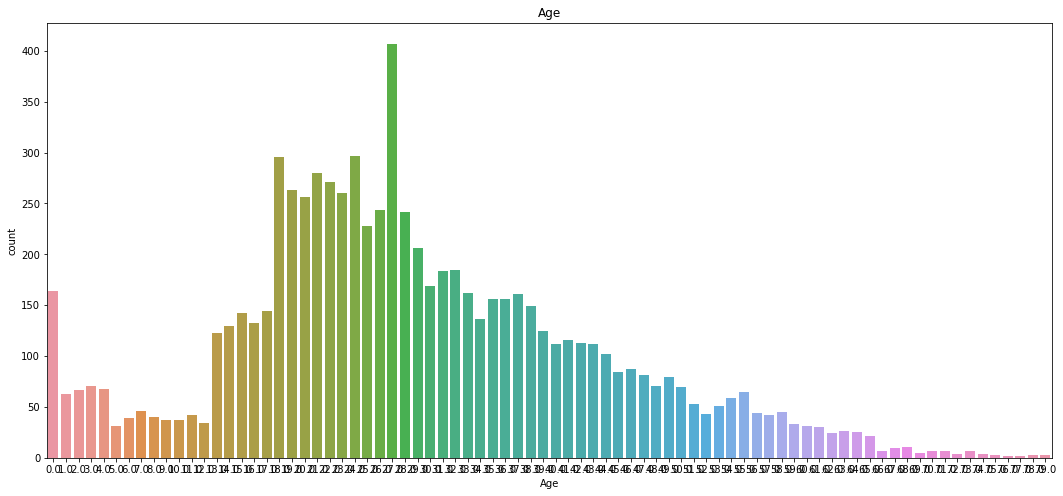

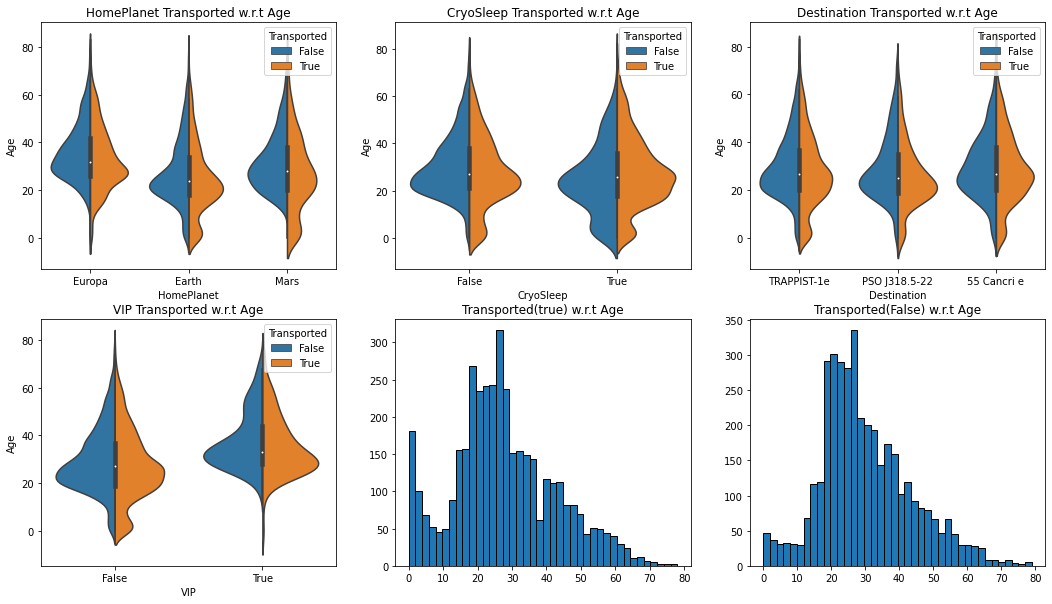

Min RoomService  0.0
Mean RoomService  217.35517197933729
Max RoomService  9920.0


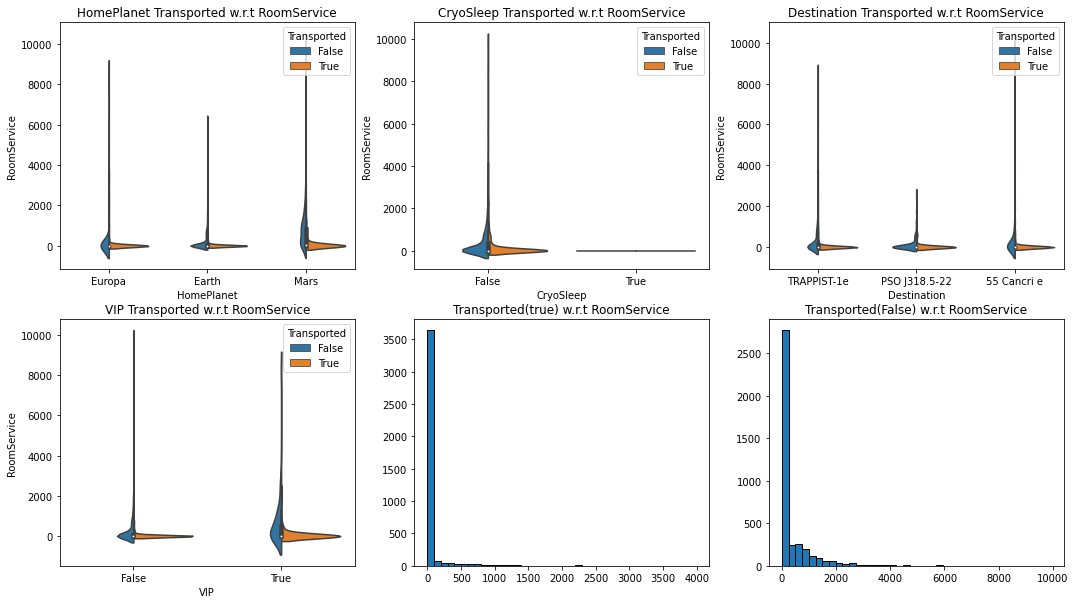

Min FoodCourt  0.0
Mean FoodCourt  455.26974927554494
Max FoodCourt  29813.0


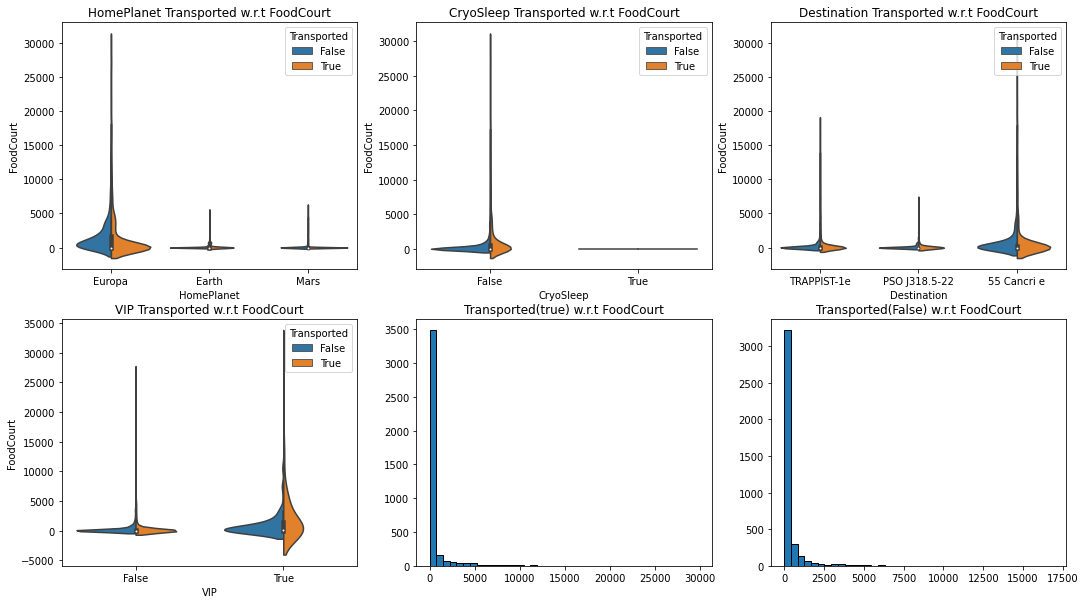

Min ShoppingMall  0.0
Mean ShoppingMall  169.750787451178
Max ShoppingMall  12253.0


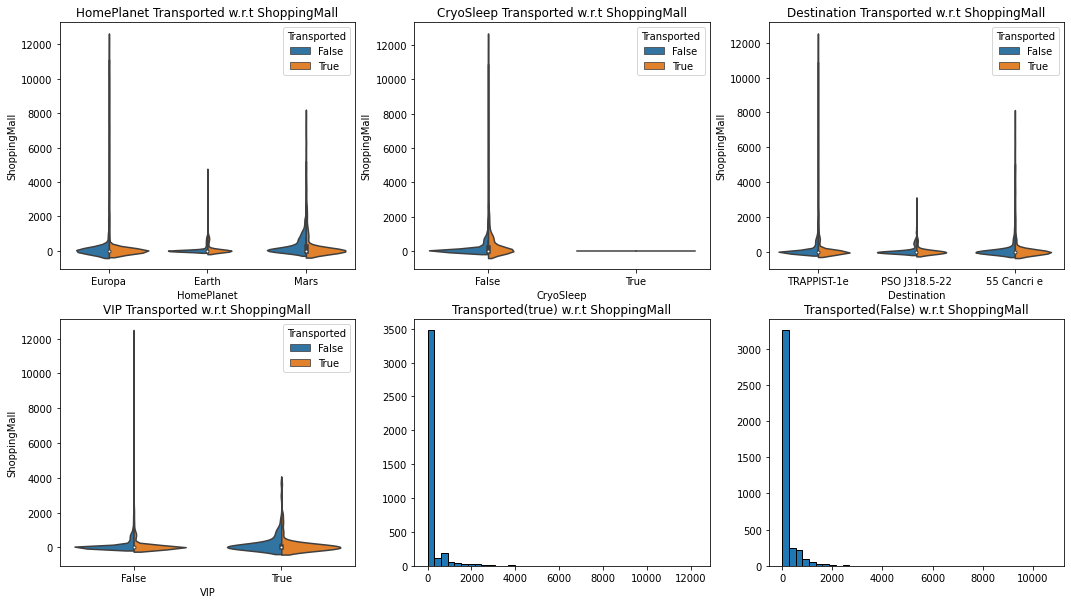

Min Spa  0.0
Mean Spa  300.19944563437065
Max Spa  22408.0


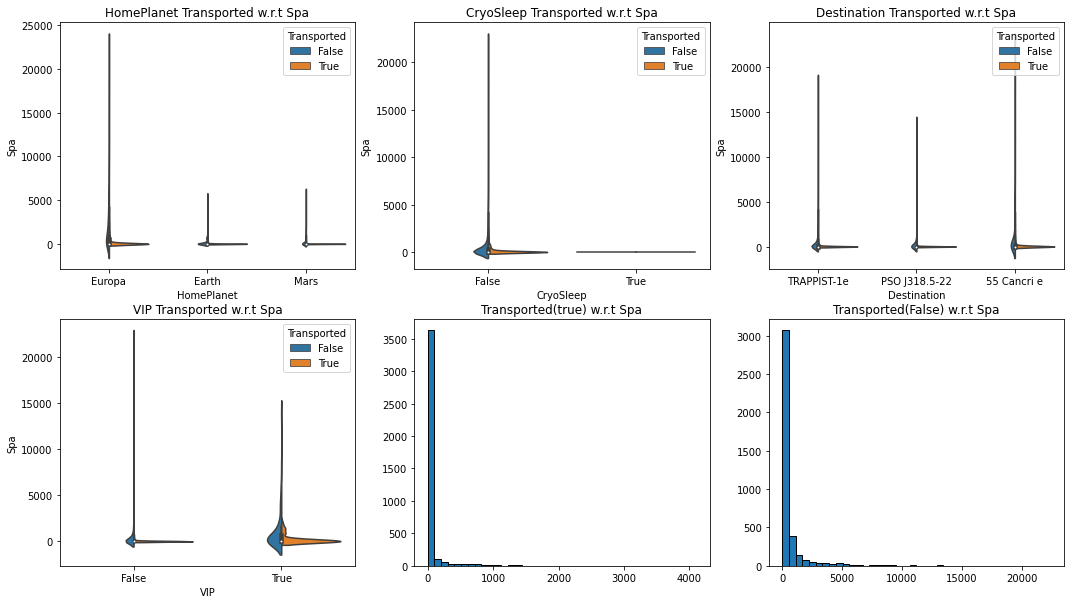

Min VRDeck  0.0
Mean VRDeck  298.5452941917601
Max VRDeck  20336.0


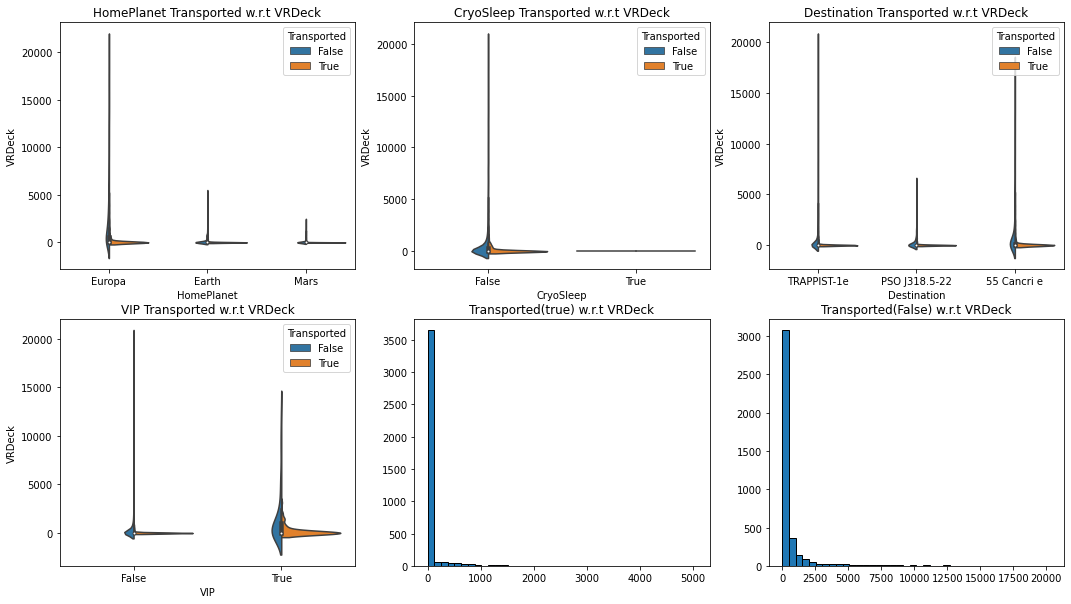

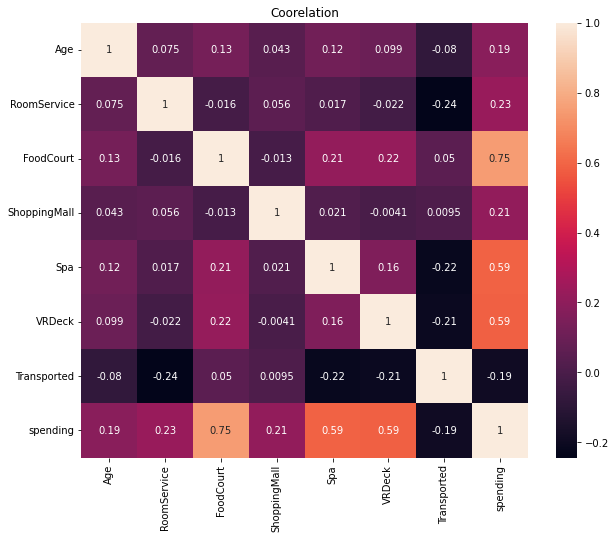

In [8]:
eda_func.EDA_function(data)

# Feature Engineering

In [9]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,spending
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0


In [10]:
data['HomePlanet'].replace(['Europa','Earth','Mars'],[0,1,2],inplace=True)
data['CryoSleep'].replace([False,True],[0,1],inplace=True)
data['Destination'].replace(['TRAPPIST-1e','PSO J318.5-22','55 Cancri e'],[0,1,2],inplace=True)
data['VIP'].replace([False,True],[0,1],inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [11]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16) & (data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32) & (data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48) & (data['Age']<=64),'Age_band']=3
data.loc[(data['Age']>64), 'Age_band']=4

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


when i used 10 partitions then the coorelation value i got between Age and Age_band was around 0.8 but when i used 5 partitions the coorelation value i got was 0.95 so went with 5 partitions

In [12]:
data['Age_band'].value_counts()

1    3932
2    1923
0    1266
3     720
4      96
Name: Age_band, dtype: int64

In [13]:
print("Min RoomService:",data.RoomService.min())
print("Mean RoomService:",data.RoomService.mean())
print("Max RoomService:",data.RoomService.max())

Min RoomService: 0.0
Mean RoomService: 217.35517197933729
Max RoomService: 9920.0


In [14]:
data['RoomService_band']=0
data.loc[data['RoomService']<=1000,'RoomService_band']=0
data.loc[(data['RoomService']>1000) & (data['RoomService']<=2000),'RoomService_band']=1
data.loc[(data['RoomService']>2000) & (data['RoomService']<=3000),'RoomService_band']=2
data.loc[(data['RoomService']>3000) & (data['RoomService']<=4000),'RoomService_band']=3
data.loc[(data['RoomService']>4000) & (data['RoomService']<=5000),'RoomService_band']=4
data.loc[(data['RoomService']>5000) & (data['RoomService']<=6000),'RoomService_band']=5
data.loc[(data['RoomService']>6000) & (data['RoomService']<=7000),'RoomService_band']=6
data.loc[(data['RoomService']>7000) & (data['RoomService']<=8000),'RoomService_band']=7
data.loc[(data['RoomService']>8000) & (data['RoomService']<=9000),'RoomService_band']=8
data.loc[(data['RoomService']>7200), 'RoomService_band']=9

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


when i used 5 partitions then the coorelation value i got between RoomService and RoomService_band was around 0.86 but when i used 10 partitions the coorelation value i got was 0.94 so went with 10 partitions

In [15]:
data['RoomService_band'].value_counts()

0    7394
1     354
2     106
3      47
4      13
5      10
9       8
6       4
7       1
Name: RoomService_band, dtype: int64

In [16]:
print("Min FoodCourt:",data.FoodCourt.min())
print("Mean FoodCourt:",data.FoodCourt.mean())
print("Max FoodCourt:",data.FoodCourt.max())

Min FoodCourt: 0.0
Mean FoodCourt: 455.26974927554494
Max FoodCourt: 29813.0


In [17]:
data['FoodCourt_band']=0
data.loc[data['FoodCourt']<=1000,'FoodCourt_band']=0
data.loc[(data['FoodCourt']>1000) & (data['FoodCourt']<=2000),'FoodCourt_band']=1
data.loc[(data['FoodCourt']>2000) & (data['FoodCourt']<=3000),'FoodCourt_band']=2
data.loc[(data['FoodCourt']>3000) & (data['FoodCourt']<=4000),'FoodCourt_band']=3
data.loc[(data['FoodCourt']>4000) & (data['FoodCourt']<=5000),'FoodCourt_band']=4
data.loc[(data['FoodCourt']>5000) & (data['FoodCourt']<=6000),'FoodCourt_band']=5
data.loc[(data['FoodCourt']>6000) & (data['FoodCourt']<=7000),'FoodCourt_band']=6
data.loc[(data['FoodCourt']>7000) & (data['FoodCourt']<=8000),'FoodCourt_band']=7
data.loc[(data['FoodCourt']>8000) & (data['FoodCourt']<=9000),'FoodCourt_band']=8
data.loc[(data['FoodCourt']>7200), 'FoodCourt_band']=9

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


For 10 partitions the coorelation value i got between FoodCourt and FoodCourt_band was around 0.94

In [18]:
data['FoodCourt_band'].value_counts()

0    7152
1     285
2     135
3     112
9     102
4      85
5      35
6      25
7       6
Name: FoodCourt_band, dtype: int64

In [19]:
print("Min ShoppingMall:",data.ShoppingMall.min())
print("Mean ShoppingMall:",data.ShoppingMall.mean())
print("Max ShoppingMall:",data.ShoppingMall.max())

Min ShoppingMall: 0.0
Mean ShoppingMall: 169.750787451178
Max ShoppingMall: 12253.0


In [20]:
data['ShoppingMall_band']=0
data.loc[data['ShoppingMall']<=1000,'ShoppingMall_band']=0
data.loc[(data['ShoppingMall']>1000) & (data['ShoppingMall']<=2000),'ShoppingMall_band']=1
data.loc[(data['ShoppingMall']>2000) & (data['ShoppingMall']<=3000),'ShoppingMall_band']=2
data.loc[(data['ShoppingMall']>3000) & (data['ShoppingMall']<=4000),'ShoppingMall_band']=3
data.loc[(data['ShoppingMall']>4000) & (data['ShoppingMall']<=5000),'ShoppingMall_band']=4
data.loc[(data['ShoppingMall']>5000) & (data['ShoppingMall']<=6000),'ShoppingMall_band']=5
data.loc[(data['ShoppingMall']>6000) & (data['ShoppingMall']<=7000),'ShoppingMall_band']=6
data.loc[(data['ShoppingMall']>7000) & (data['ShoppingMall']<=8000),'ShoppingMall_band']=7
data.loc[(data['ShoppingMall']>8000) & (data['ShoppingMall']<=9000),'ShoppingMall_band']=8
data.loc[(data['ShoppingMall']>7200), 'ShoppingMall_band']=9

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


For 10 partitions the coorelation value i got between ShoppingMall and ShoppingMall_band was around 0.92

In [21]:
data['ShoppingMall_band'].value_counts()

0    7581
1     239
2      75
3      14
4      14
9       5
6       4
5       3
7       2
Name: ShoppingMall_band, dtype: int64

In [22]:
print("Min Spa:",data.Spa.min())
print("Mean Spa:",data.Spa.mean())
print("Max Spa:",data.Spa.max())

Min Spa: 0.0
Mean Spa: 300.19944563437065
Max Spa: 22408.0


In [23]:
data['Spa_band']=0
data.loc[data['Spa']<=1000,'Spa_band']=0
data.loc[(data['Spa']>1000) & (data['Spa']<=2000),'Spa_band']=1
data.loc[(data['Spa']>2000) & (data['Spa']<=3000),'Spa_band']=2
data.loc[(data['Spa']>3000) & (data['Spa']<=4000),'Spa_band']=3
data.loc[(data['Spa']>4000) & (data['Spa']<=5000),'Spa_band']=4
data.loc[(data['Spa']>5000) & (data['Spa']<=6000),'Spa_band']=5
data.loc[(data['Spa']>6000) & (data['Spa']<=7000),'Spa_band']=6
data.loc[(data['Spa']>7000) & (data['Spa']<=8000),'Spa_band']=7
data.loc[(data['Spa']>8000) & (data['Spa']<=9000),'Spa_band']=8
data.loc[(data['Spa']>7200), 'Spa_band']=9

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


For 10 partitions the coorelation value i got between Spa and Spa_band was around 0.95

In [24]:
data['Spa_band'].value_counts()

0    7367
1     266
2     101
3      62
4      55
9      43
5      25
6      17
7       1
Name: Spa_band, dtype: int64

In [25]:
print("Min VRDeck:",data.VRDeck.min())
print("Mean VRDeck:",data.VRDeck.mean())
print("Max VRDeck:",data.VRDeck.max())

Min VRDeck: 0.0
Mean VRDeck: 298.5452941917601
Max VRDeck: 20336.0


In [26]:
data['VRDeck_band']=0
data.loc[data['VRDeck']<=1000,'VRDeck_band']=0
data.loc[(data['VRDeck']>1000) & (data['VRDeck']<=2000),'VRDeck_band']=1
data.loc[(data['VRDeck']>2000) & (data['VRDeck']<=3000),'VRDeck_band']=2
data.loc[(data['VRDeck']>3000) & (data['VRDeck']<=4000),'VRDeck_band']=3
data.loc[(data['VRDeck']>4000) & (data['VRDeck']<=5000),'VRDeck_band']=4
data.loc[(data['VRDeck']>5000) & (data['VRDeck']<=6000),'VRDeck_band']=5
data.loc[(data['VRDeck']>6000) & (data['VRDeck']<=7000),'VRDeck_band']=6
data.loc[(data['VRDeck']>7000) & (data['VRDeck']<=8000),'VRDeck_band']=7
data.loc[(data['VRDeck']>8000) & (data['VRDeck']<=9000),'VRDeck_band']=8
data.loc[(data['VRDeck']>7200), 'VRDeck_band']=9

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


For 10 partitions the coorelation value i got between VRDeck and VRDeck_band was around 0.96

In [27]:
data['VRDeck_band'].value_counts()

0    7362
1     282
2      97
3      58
9      55
4      40
5      26
6      15
7       2
Name: VRDeck_band, dtype: int64

In [28]:
print("Min spending:",data.spending.min())
print("Mean spending:",data.spending.mean())
print("Max spending:",data.spending.max())

Min spending: 0.0
Mean spending: 1441.120448532191
Max spending: 35987.0


In [29]:
data['spending_band']=0
data.loc[data['spending']<=1000,'spending_band']=0
data.loc[(data['spending']>1000) & (data['spending']<=2000),'spending_band']=1
data.loc[(data['spending']>2000) & (data['spending']<=3000),'spending_band']=2
data.loc[(data['spending']>3000) & (data['spending']<=4000),'spending_band']=3
data.loc[(data['spending']>4000) & (data['spending']<=5000),'spending_band']=4
data.loc[(data['spending']>5000) & (data['spending']<=6000),'spending_band']=5
data.loc[(data['spending']>6000) & (data['spending']<=7000),'spending_band']=6
data.loc[(data['spending']>7000) & (data['spending']<=8000),'spending_band']=7
data.loc[(data['spending']>8000) & (data['spending']<=9000),'spending_band']=8
data.loc[(data['spending']>7200), 'spending_band']=9

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


For 10 partitions the coorelation value i got between spending and spending_band was around 0.91

In [30]:
data['spending_band'].value_counts()

0    5351
1    1056
2     508
9     332
3     266
4     167
5     137
6     104
7      16
Name: spending_band, dtype: int64

In [31]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,spending,Age_band,RoomService_band,FoodCourt_band,ShoppingMall_band,Spa_band,VRDeck_band,spending_band
0,0001_01,0,0,B/0/P,0,39.0,0,0.0,0.0,0.0,...,Maham Ofracculy,False,0.0,2,0,0,0,0,0,0
1,0002_01,1,0,F/0/S,0,24.0,0,109.0,9.0,25.0,...,Juanna Vines,True,736.0,1,0,0,0,0,0,0
2,0003_01,0,0,A/0/S,0,58.0,1,43.0,3576.0,0.0,...,Altark Susent,False,10383.0,3,0,3,0,6,0,9
3,0003_02,0,0,A/0/S,0,33.0,0,0.0,1283.0,371.0,...,Solam Susent,False,5176.0,2,0,1,0,3,0,5
4,0004_01,1,0,F/1/S,0,16.0,0,303.0,70.0,151.0,...,Willy Santantines,True,1091.0,0,0,0,0,0,0,1


In [32]:
data.drop(['Name','Age','RoomService','FoodCourt','Spa','ShoppingMall','VRDeck','spending','Cabin'],axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


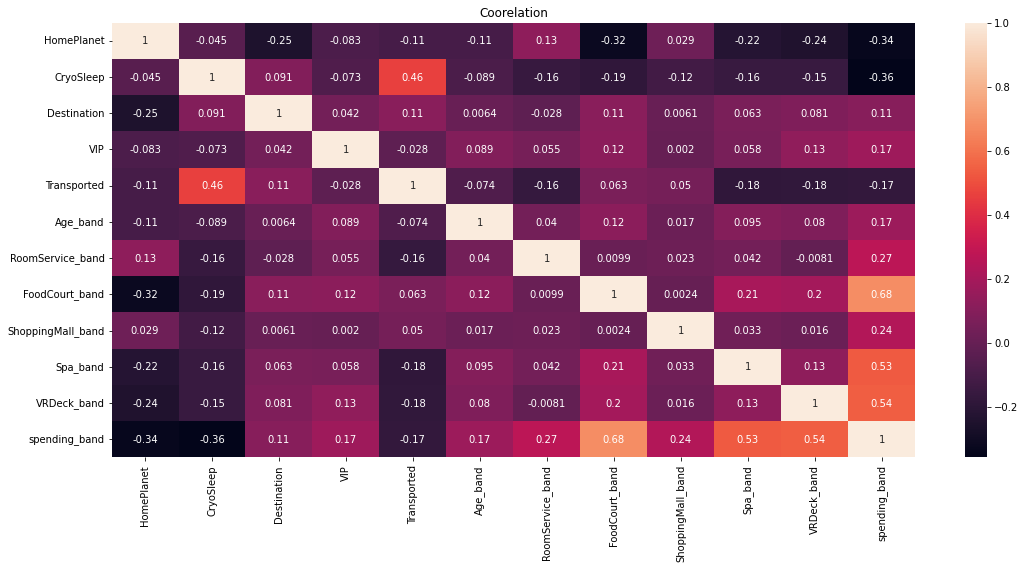

In [33]:
fig = plt.figure(figsize=(18,8))

sns.heatmap(data.corr(),annot=True)
plt.title("Coorelation")
plt.show()